**Đồ án nhóm 11: Phân loại khách hàng tiềm năng**

*Thành viên nhóm:*

- Nguyễn Tuấn Phát          030138220308

---


- Trần Thị Yến Nhi          030138220288

---


- Nguyễn Lê Thanh Trang     030138220420

---


- Trần Nguyễn Tân Khoa      030138220176

---


- Phan Thùy Dung            030138220063

---


- Hoàng Yến Nhi             030138220279

# Sơ lược dữ liệu
**Bank client data:**
1. Age: tuổi (số, dạng số).

2. Job: loại công việc (phân loại: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services").

3. Marital: tình trạng hôn nhân (phân loại: "married", "divorced", "single"; lưu ý: "divorced" có thể bao gồm đã ly hôn hoặc góa).

4. Education: trình độ học vấn (phân loại: "unknown", "secondary", "primary", "tertiary").

5. Default: có nợ tín dụng không? (nhị phân: "yes", "no").

6. Balance: số dư trung bình hàng năm, tính bằng euro (số, dạng số).

7. Housing: có khoản vay nhà ở không? (nhị phân: "yes", "no").

8. Loan: có khoản vay cá nhân không? (nhị phân: "yes", "no").

**Related with the last contact of the current campaign:**

9. Contact: Phương thức liên lạc với khách hàng (phân loại: "unknown","telephone","cellular").

10. Day: Ngày thực hiện chiến dịch (số).

11. Month: Tháng thực hiện chiến dịch (phân loại: "jan", "feb", "mar", …, "nov", "dec").

12. Duration: Thời gian của cuộc gọi (tính bằng giây, số nguyên).

**Other attributes:**

13. Campaign: Số cuộc gọi đã thực hiện trong chiến dịch (số).

14. Pdays: Số ngày kể từ chiến dịch trước (số, -1 tức là khách hàng chưa từng được liên lạc).

15. Previous: Số cuộc gọi đã thực hiện trong các chiến dịch trước đó (số).

16. Poutcome: Kết quả của chiến dịch trước đó (phân loại: "unknown","other","failure","success").

**Output variable (desired target):**

17. y: Khách hàng có đăng ký sản phẩm "tiền gửi có kỳ hạn" hay không (có/không).

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('Data.csv', sep=';')
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1. Kiểm tra thông tin cơ bản về dữ liệu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# 2. Làm sạch dữ liệu

a. Xử lý trùng lắp

In [17]:
#dem so luong trung
df.duplicated().sum()

0

b. Xử lý giá trị thiếu

In [20]:
missing_data = df.isnull()
#check lại missing value
for col in missing_data.columns:
  x = missing_data[col].sum()
  print(f"{col}: {x}")

age: 0
job: 0
marital: 0
education: 0
default: 0
balance: 0
housing: 0
loan: 0
contact: 0
day: 0
month: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
y: 0


c. Các giá trị chưa rõ

In [23]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
total_counts = df.shape[0]
unknown_percentage = (unknown_counts / total_counts) * 100
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [25]:
df.shape

(45211, 17)

In [27]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [29]:
df.poutcome.value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [31]:
# xóa các giá trị unknown trong education và job
df.drop(df[df['education'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

In [33]:
#convert the y to 0 and 1
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

y
0    38172
1     5021
Name: count, dtype: int64

In [37]:
new_data = df[df["age"]>=20][df["age"]<=60]
new_data = new_data[new_data["campaign"]<=10]
new_data = new_data[new_data["balance"]<=20000]
new_data = new_data[new_data["pdays"]<=400]
new_data = new_data[new_data["duration"]<=2000]
new_data = new_data[new_data["previous"]<=100]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40543 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40543 non-null  int64 
 1   job        40543 non-null  object
 2   marital    40543 non-null  object
 3   education  40543 non-null  object
 4   default    40543 non-null  object
 5   balance    40543 non-null  int64 
 6   housing    40543 non-null  object
 7   loan       40543 non-null  object
 8   contact    40543 non-null  object
 9   day        40543 non-null  int64 
 10  month      40543 non-null  object
 11  duration   40543 non-null  int64 
 12  campaign   40543 non-null  int64 
 13  pdays      40543 non-null  int64 
 14  previous   40543 non-null  int64 
 15  poutcome   40543 non-null  object
 16  y          40543 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.6+ MB


C:\Users\acer\AppData\Local\Temp\ipykernel_6088\3761692393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = df[df["age"]>=20][df["age"]<=60]


In [39]:
df = new_data.copy()
df.index = range(len(new_data))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40543 entries, 0 to 40542
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40543 non-null  int64 
 1   job        40543 non-null  object
 2   marital    40543 non-null  object
 3   education  40543 non-null  object
 4   default    40543 non-null  object
 5   balance    40543 non-null  int64 
 6   housing    40543 non-null  object
 7   loan       40543 non-null  object
 8   contact    40543 non-null  object
 9   day        40543 non-null  int64 
 10  month      40543 non-null  object
 11  duration   40543 non-null  int64 
 12  campaign   40543 non-null  int64 
 13  pdays      40543 non-null  int64 
 14  previous   40543 non-null  int64 
 15  poutcome   40543 non-null  object
 16  y          40543 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.3+ MB


# 3. EDA

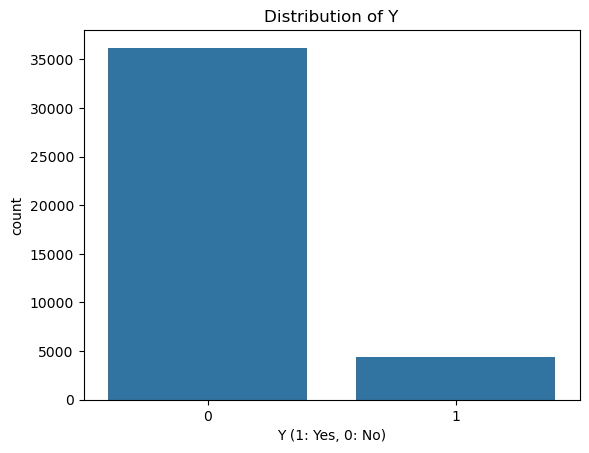

In [42]:
# Phân phối của biến mục tiêu (Y))
sns.countplot(data=df, x='y')
plt.title('Distribution of Y')
plt.xlabel('Y (1: Yes, 0: No)')
plt.show()

**Nhận xét:**
- Biểu đồ cho thấy tỷ lệ khách hàng đăng ký sử dụng tiền gửi có kỳ hạn thấp hơn tỷ lệ khách hàng không đăng ký.
- Đây là dữ liệu mất cân bằng, ảnh hưởng đến việc xây dựng mô hình vì nó có thể dự đoán lệch về phía lớp chiếm đa số.
- Cần xem xét kỹ các đặc trưng có ảnh hưởng lớn đến việc khách hàng đồng ý hay không.

## Phân tích tác động của biến phân loại -> biến mục tiêu (y)




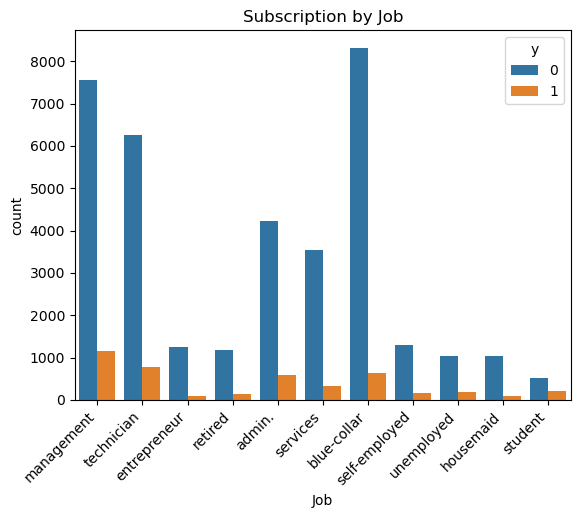

In [46]:
# Phân tích ảnh hưởng của biến 'job' đến biến mục tiêu 'y'
sns.countplot(data=df, x='job', hue='y')
plt.title('Subscription by Job')
plt.xlabel('Job')
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc
plt.show()

**Nhận xét:**

- Xu hướng khách hàng mà ngân hàng liên lạc đa số là quản lý, công nhân và kỹ thuật viên.
- Trong khi đó, học sinh, nội trợ, người thất nghiệp hay freelancer ít xuất hiện hơn
- Dữ liệu cho thấy sự chênh lệch lớn giữa các nhóm nghề, với một số nhóm chiếm ưu thế vượt trội, trong khi các nhóm khác rất ít.


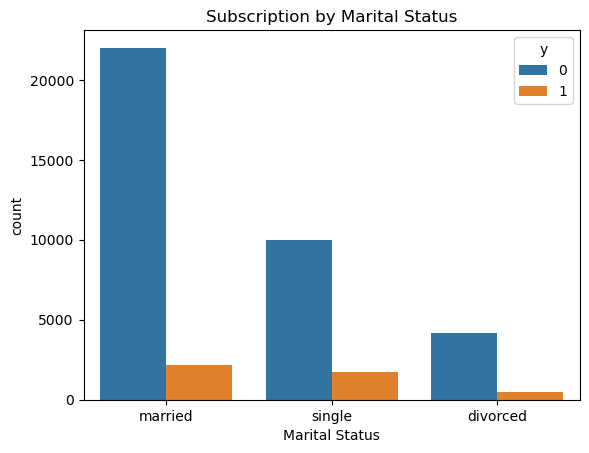

In [49]:
# Phân tích ảnh hưởng của biến 'marital đến biến mục tiêu 'y'
sns.countplot(data=df, x='marital', hue='y')
plt.title('Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.show()

**Nhận xét:**
- Khách hàng đa số là người đã có gia đình, thu nhập ổn định mà muốn có khoản tiết kiệm để sử dụng cho các mục đích sau này như mua nhà, sinh con, về hưu.
- Số khách hàng độc thân chiếm thứ 2, có thể họ cần một khoản đầu tư an toàn và sinh lời tốt.
- Khách hàng đã ly hôn chiếm số lượng thấp nhất, có thể ít có nhu cầu sử dụng các sản phẩm dịch vụ ngân hàng.

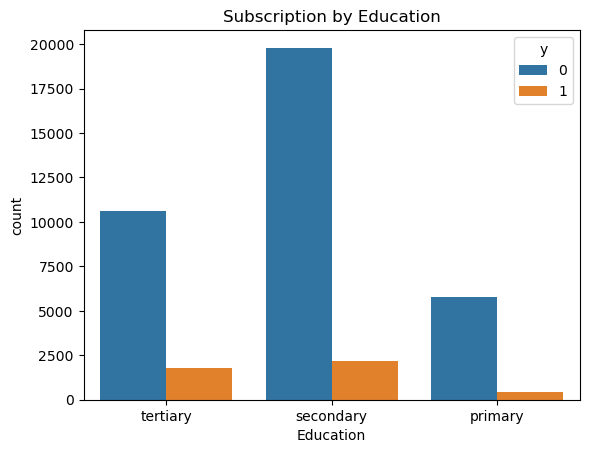

In [52]:
# Phân tích ảnh hưởng của biến 'education' đến biến mục tiêu 'y'
sns.countplot(data=df, x='education', hue='y')
plt.title('Subscription by Education')
plt.xlabel('Education')
plt.show()

**Nhận xét:**
- Khách hàng với trình độ trung học: Đây có thể là nhóm đối tượng chính của ngân hàng, vì họ chiếm phần lớn dân số lao động.
Ngân hàng có thể đang phục vụ nhiều khách hàng thuộc tầng lớp lao động phổ thông.
- Khách hàng với trình độ đại học (tertiary): Đây là nhóm có thể đang giữ các công việc có thu nhập cao hơn, nhưng số lượng ít hơn so với nhóm trung học.
- Khách hàng với trình độ tiểu học (primary): Đây có thể là nhóm ít có khả năng tiếp cận ngân hàng hoặc ít sử dụng các dịch vụ ngân hàng do hạn chế về kinh tế hoặc trình độ.

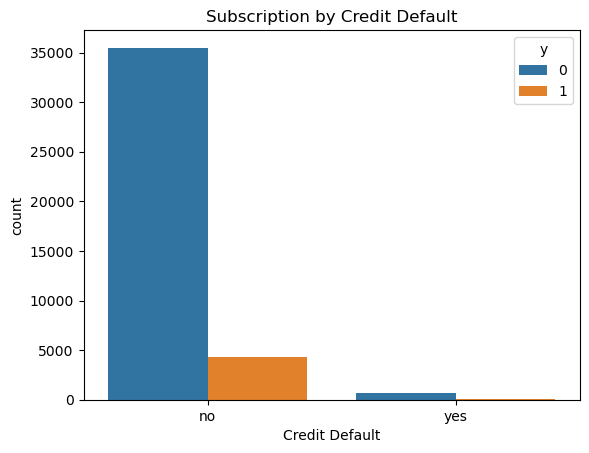

In [55]:
# Phân tích ảnh hưởng của biến 'default' đến biến mục tiêu 'y'
sns.countplot(data=df, x='default', hue='y')
plt.title('Subscription by Credit Default')
plt.xlabel('Credit Default')
plt.show()

**Nhận xét:**
- Khách hàng không có nợ tín dụng mặc định có số lượng đồng ý nhiều hơn so với khách hàng có nợ mặc định.
- Đây là điều đương nhiên khi khách hàng không đủ khả năng chi trả thì không thể có tài sản để gửi tiết kiệm.

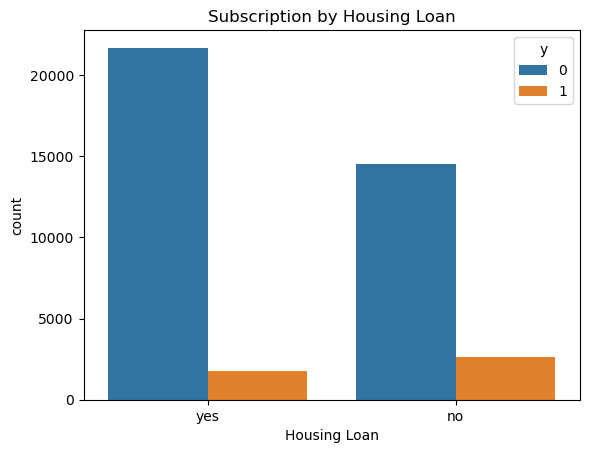

In [58]:
# Phân tích ảnh hưởng của biến 'housing' đến biến mục tiêu 'y'
sns.countplot(data=df, x='housing', hue='y')
plt.title('Subscription by Housing Loan')
plt.xlabel('Housing Loan')
plt.show()

**Nhận xét:**
- Số khách hàng có khoản vay mua nhà ít nhu cầu sử dụng dịch vụ tiền gửi có kỳ hạn hơn số khách hàng không vay mua nhà.
- Điều này có thể hơi lạ thường tuy nhiên có thể lý giải cho vấn đề này là các khoản vay mua nhà thường rất lớn, khách hàng cần một nơi đầu tư có sinh lợi nhiều hơn như chứng khoán, tiền điện tử hơn là khoản đầu tư an toàn như tiền gửi tiết kiệm

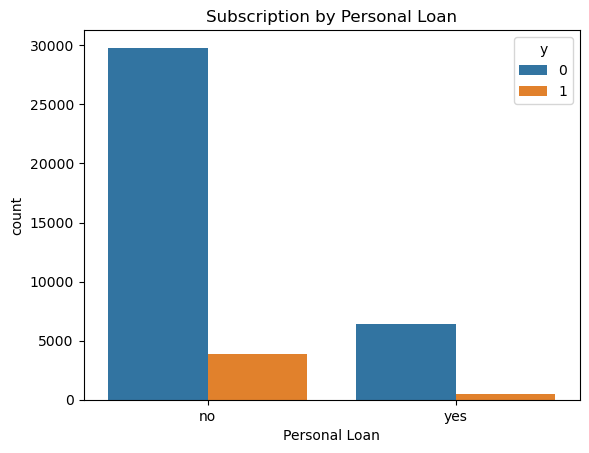

In [61]:
# Phân tích ảnh hưởng của biến 'loan' đến biến mục tiêu 'y'
sns.countplot(data=df, x='loan', hue='y')
plt.title('Subscription by Personal Loan')
plt.xlabel('Personal Loan')
plt.show()

**Nhận xét:**
- Khách hàng vay cá nhân (hay vay tiêu dùng) có tỷ lệ đồng ý thấp hơn so với khách hàng không vay.
- Lý giải cho điều này có thể là nguồn thu nhập của họ không ổn định, họ không có nhu cầu sử dụng dịch vụ dài hạn như tiền gửi có kỳ hạn.

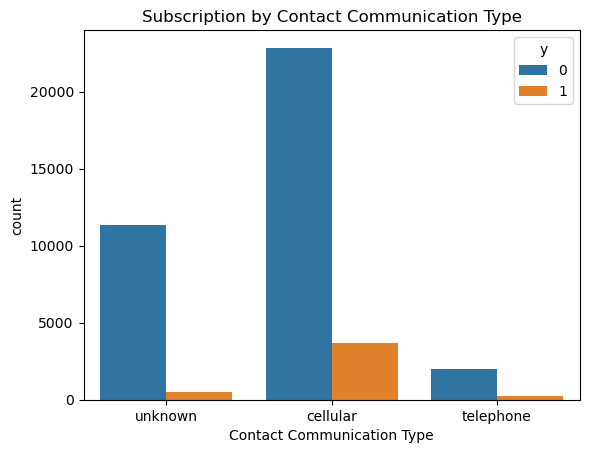

In [64]:
# Phân tích ảnh hưởng của biến 'contact' đến biến mục tiêu 'y'
sns.countplot(data=df, x='contact', hue='y')
plt.title('Subscription by Contact Communication Type')
plt.xlabel('Contact Communication Type')
plt.show()


**Nhận xét:**
- Hình thức liên hệ "cellular" có tỷ lệ khách hàng đăng ký cao nhất: Điều này cho thấy việc liên hệ với khách hàng qua số di động (cellular) là một kênh hiệu quả để thúc đẩy khách hàng đăng ký dịch vụ tiền gửi có kỳ hạn. Ngân hàng nên tăng cường tiếp thị thông qua hình thức này.
- Hình thức liên hệ "telephone" có tỷ lệ đăng ký thấp nhất: Điều này cho thấy khách hàng không còn sử dụng điện thoại bàn, do đó không cần thiết sử dụng đến phương thức liên hệ này.


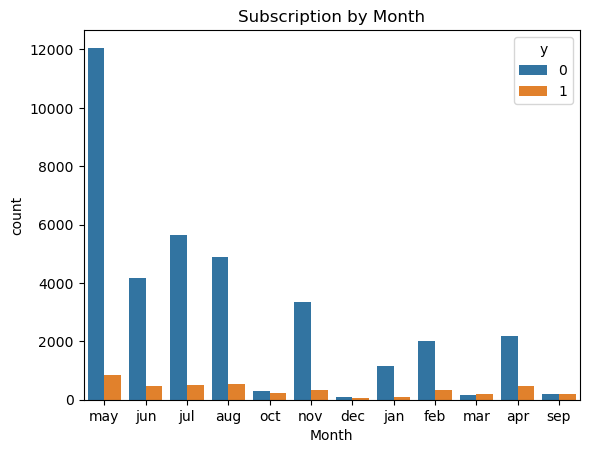

In [67]:
# Phân tích ảnh hưởng của biến 'month' đến biến mục tiêu 'y'
sns.countplot(data=df, x='month', hue='y')
plt.title('Subscription by Month')
plt.xlabel('Month')
plt.show()

**Nhận xét:**
- Tháng 5 có số lượng đăng ký cao nhất: Điều này cho thấy tháng 5 là tháng có chiến dịch marketing hiệu quả nhất hoặc có một sự kiện đặc biệt nào đó đã thúc đẩy khách hàng đăng ký.
Xu hướng giảm dần sau tháng 5:
- Sau đỉnh điểm ở tháng 5, số lượng đăng ký có xu hướng giảm dần cho đến cuối năm. Tuy nhiên, có một số tháng xuất hiện các đợt tăng nhẹ như tháng 7, 10, 1 và 4.
- Sự biến động theo mùa: Biểu đồ cho thấy có thể tồn tại một yếu tố mùa vụ ảnh hưởng đến quyết định đăng ký của khách hàng. Ví dụ, các tháng cuối năm thường có nhiều hoạt động khuyến mãi, nên số lượng đăng ký có thể tăng nhẹ so với các tháng khác.

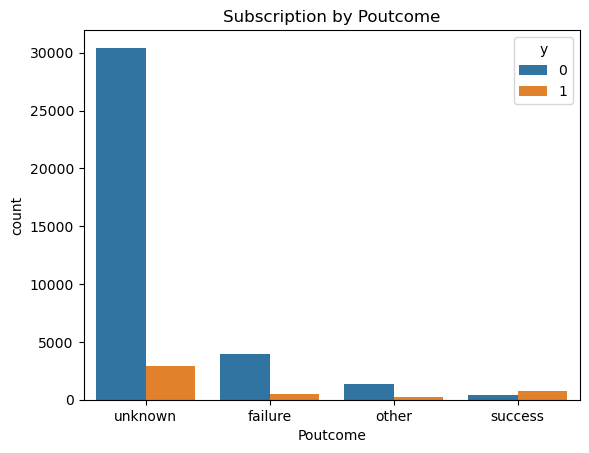

In [70]:
# Phân tích ảnh hưởng của biến 'poutcome' đến biến mục tiêu 'y'
sns.countplot(data=df, x='poutcome', hue='y')
plt.title('Subscription by Poutcome')
plt.xlabel('Poutcome')
plt.show()

**Nhận xét:**
- Kết quả "unknown" chiếm tỷ lệ lớn nhất và có số lượng khách hàng đăng ký cao nhất: Điều này có thể cho thấy rằng nhiều khách hàng không có thông tin về các chiến dịch marketing trước đó hoặc thông tin này không được ghi lại đầy đủ. Tuy nhiên, nhóm khách hàng này lại có khả năng đăng ký dịch vụ mới cao nhất.
- Kết quả "failure" có số lượng khách hàng đăng ký thấp hơn so với "unknown" nhưng vẫn cao hơn các kết quả còn lại: Điều này cho thấy những khách hàng đã từng tham gia các chiến dịch không thành công vẫn có khả năng đăng ký dịch vụ mới, mặc dù tỷ lệ thấp hơn.
- Kết quả "success" và "other" có số lượng khách hàng đăng ký thấp nhất: Điều này cho thấy những khách hàng đã từng tham gia các chiến dịch thành công hoặc các chiến dịch khác có khả năng đăng ký dịch vụ mới thấp nhất.

## Phân tích các tác động của biến số -> biến mục tiêu (y)

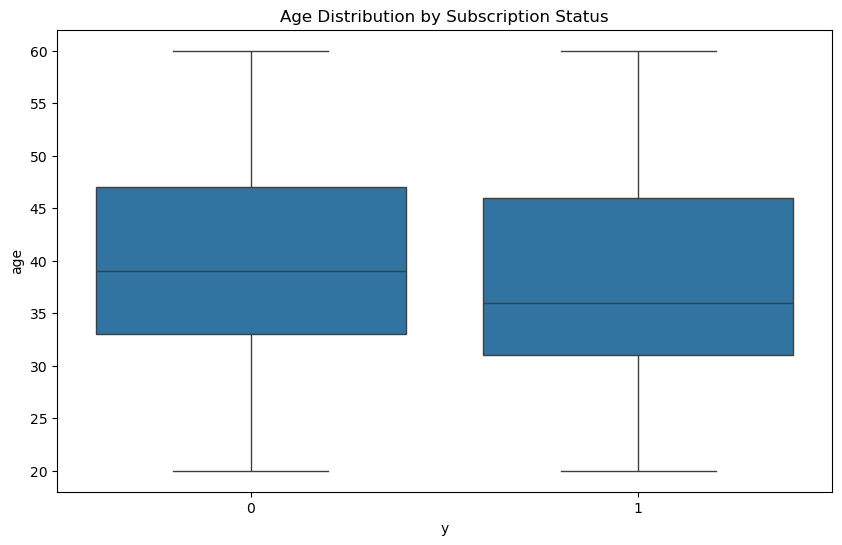

In [74]:
# Kiểm tra tác động của biến 'age' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution by Subscription Status')
plt.show()

**Nhận xét:**
- Giá trị trung vị của hai nhóm khá gần nhau: Điều này cho thấy rằng về mặt trung bình, không có sự khác biệt đáng kể về độ tuổi giữa hai nhóm khách hàng đăng ký và chưa đăng ký.
- Khoảng biến thiên của hai nhóm tương đối giống nhau: Điều này cho thấy rằng sự phân tán của dữ liệu về độ tuổi trong cả hai nhóm là tương đồng.

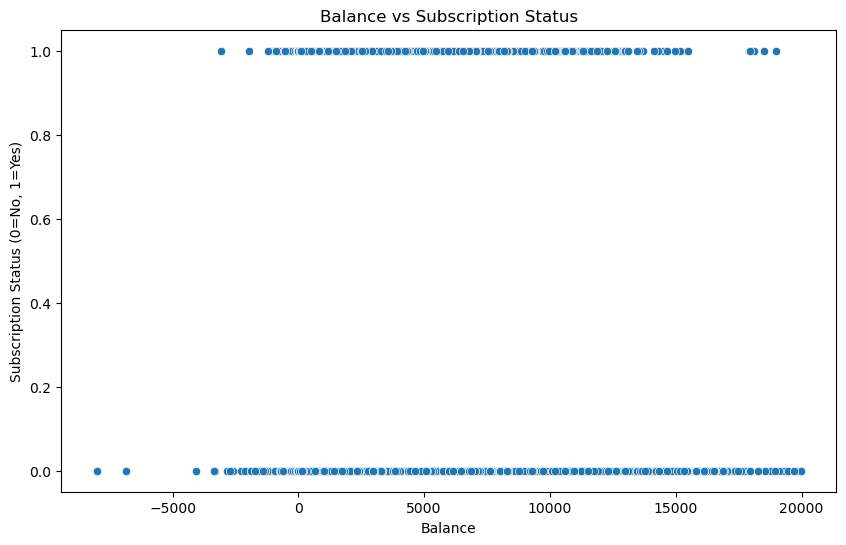

In [77]:
# Kiểm tra tác động của biến 'balance' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='y', data=df) # Sử dụng scatterplot thay vì boxplot
plt.title('Balance vs Subscription Status')
plt.xlabel('Balance')
plt.ylabel('Subscription Status (0=No, 1=Yes)')
plt.show()

**Nhận xét:**
- Giải thích về khách hàng có số dư tài khoản thấp không đăng ký dịch vụ: thấy rằng khách hàng thường không có nhu cầu hoặc khả năng chi trả cho các dịch vụ bổ sung.
- Một số lượng nhỏ khách hàng có số dư tài khoản cao cũng không đăng ký dịch vụ: Có thể có nhiều lý do cho điều này, chẳng hạn như:
  - Họ đã có đủ các dịch vụ cần thiết
  - Họ không quan tâm đến các dịch vụ được cung cấp
  - Có thể có các yếu tố khác (không được thể hiện trên biểu đồ) ảnh hưởng đến quyết định đăng ký của họ.
- Một số lượng nhỏ khách hàng có số dư tài khoản cao đã đăng ký dịch vụ: Điều này cho thấy rằng số dư tài khoản cao không phải là yếu tố quyết định duy nhất cho việc đăng ký dịch vụ. Có thể có các yếu tố khác như nhu cầu cá nhân, chiến dịch marketing, hoặc các ưu đãi đặc biệt đã tác động đến quyết định của họ.

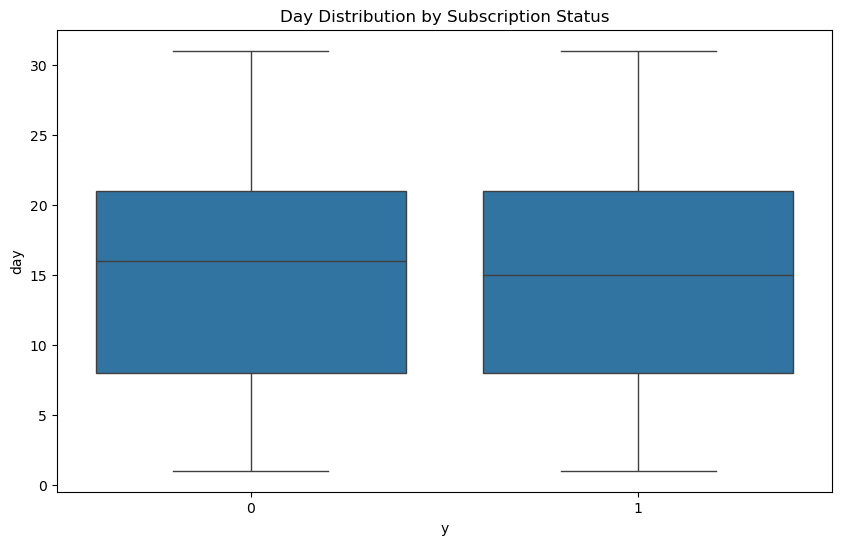

In [80]:
# Kiểm tra tác động của biến 'day' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='day', data=df)
plt.title('Day Distribution by Subscription Status')
plt.show()

**Nhận xét:**
- Giá trị trung vị của hai nhóm khá gần nhau: Điều này cho thấy rằng về mặt trung bình, không có sự khác biệt đáng kể về "ngày" giữa hai nhóm khách hàng đăng ký và chưa đăng ký.
- Khoảng biến thiên của hai nhóm tương đối giống nhau: Điều này cho thấy rằng sự phân tán của dữ liệu về "ngày" trong cả hai nhóm là tương đồng.
- Không có các giá trị ngoại lai, cho thấy dữ liệu không cần xử lý vấn đề về outliers

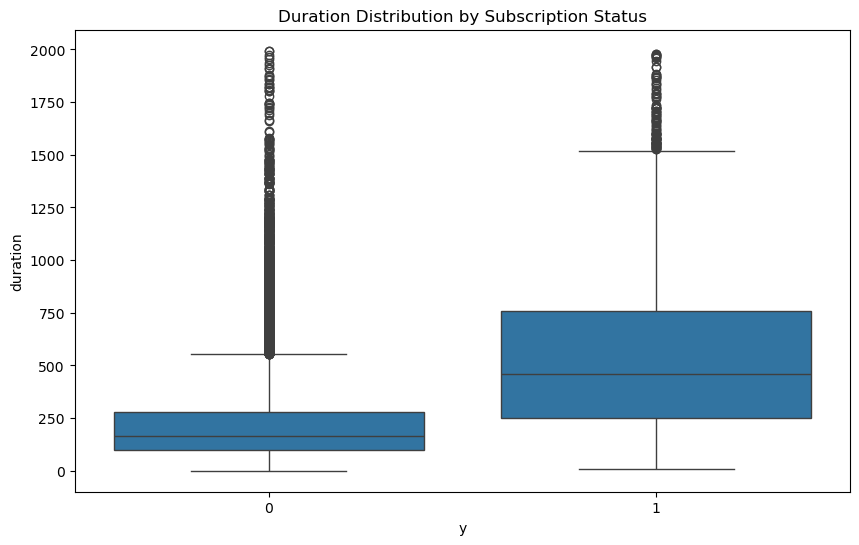

In [83]:
# Kiểm tra tác động của biến 'duration' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration Distribution by Subscription Status')
plt.show()

**Nhận xét:**
- Hầu hết khách hàng có thời gian tương tác ngắn không đăng ký: Điều này cho thấy rằng thời gian tương tác ngắn có thể chưa đủ để thuyết phục khách hàng đăng ký dịch vụ.
- Một số lượng nhỏ khách hàng có thời gian tương tác dài cũng không đăng ký: Có thể có nhiều lý do cho điều này, chẳng hạn như:
  - Họ đã có đủ thông tin nhưng vẫn chưa sẵn sàng đăng ký.
  - Họ không hài lòng với dịch vụ.
  - Có thể có các yếu tố khác (không được thể hiện trên biểu đồ) ảnh hưởng đến quyết định đăng ký của họ.
- Một số lượng nhỏ khách hàng có thời gian tương tác dài đã đăng ký: Điều này cho thấy rằng thời gian tương tác dài có thể là một yếu tố tích cực, nhưng không phải là yếu tố quyết định duy nhất.

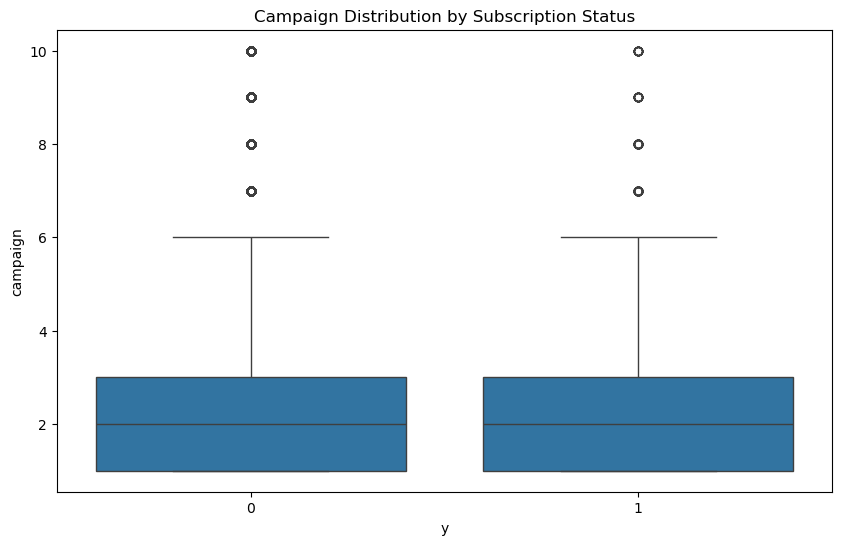

In [86]:
# Kiểm tra tác động của biến 'Campaign' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Campaign Distribution by Subscription Status')
plt.show()

**Nhận xét:**
- Đa phần dữ liệu sẽ phân bó từ 1 -> 3.
- Khách hàng nhận được 1 -> 3 cuộc gọi thường sẽ đăng ký cho thấy việc đã đăng ký sẽ xảy ra khi có nhu cầu và sau 1 2 lần sẽ quyết định
- Còn đối với khách hàng đã vốn không có nhu cầu thì ngân hàng sẽ khuyến khích gọi lại nhằm thuyêt phục nhưng phần này không nhiều vì cũng có thể khách tỏ ra khó chịu

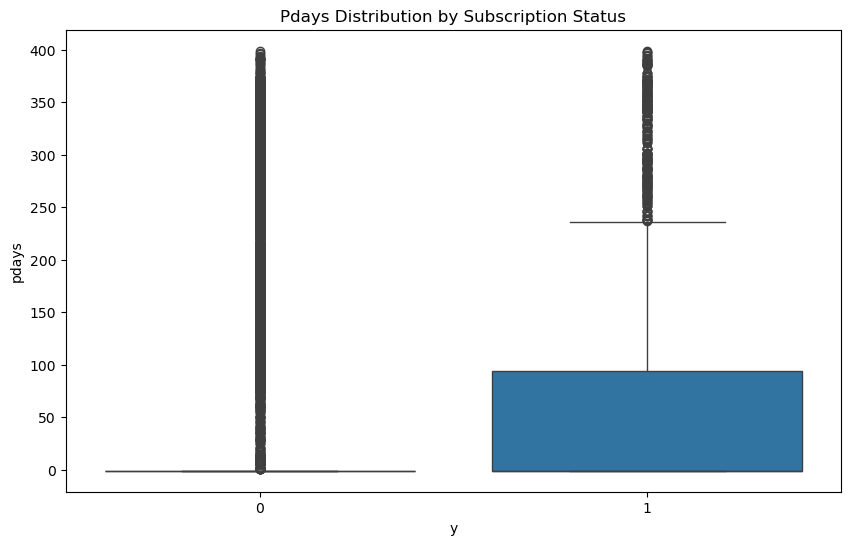

In [89]:
# Kiểm tra tác động của biến 'pdays' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='pdays', data=df)
plt.title('Pdays Distribution by Subscription Status')
plt.show()

**Nhận xét:**
- Đa phần khách hàng ở phần không đăng ký sẽ nằm ở phân khúc chưa được liên hệ nên phần lớn ngoại lai sẽ phân bố từ 0 trở lên

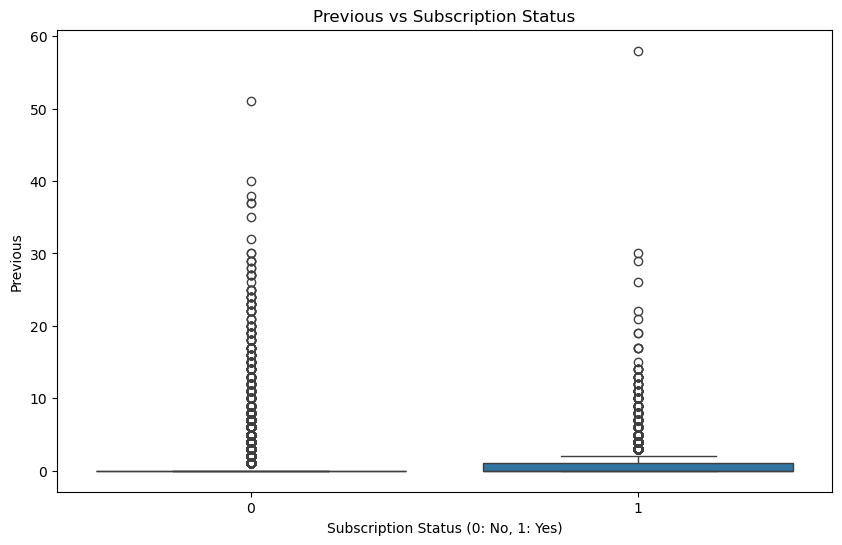

In [92]:
# Kiểm tra tác động của biến 'Previous' đến biến 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='previous', data=df)
plt.title('Previous vs Subscription Status')
plt.xlabel('Subscription Status (0: No, 1: Yes)')
plt.ylabel('Previous')
plt.show()

**Nhận xét:**
- Số cuộc gọi trước đó đối với khách hàng đã đăng ký khá ít từ 1 đến dưới 3 cuộc gọi. Dễ hiểu khi đã đồng ý đăng ký sẽ ít cuộc gọi liên hệ để quảng bá sản phẩm hơn.
- Còn về các cuộc gọi thì cũng tương tự campaign là đa phần khách hàng chưa được liên hệ trước đó

# 4. Feature Engineering

In [96]:
df['job'] = df['job'].map({
    'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
    'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
    'student': 8, 'technician': 9, 'unemployed': 10})
df['marital'] = df['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
df['education'] = df['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})

df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
df['contact'] = df['contact'].map({'cellular': 0, 'telephone': 1, 'unknown': 2})
df['month'] = df['month'].map({
    'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
    'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11
})
df['poutcome'] = df['poutcome'].map({'failure': 0, 'other': 1, 'success': 2, 'unknown': 3})

In [98]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,1,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,0,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,35,4,0,2,0,231,1,0,2,5,4,139,1,-1,0,3,0
4,28,4,1,2,0,447,1,1,2,5,4,217,1,-1,0,3,0


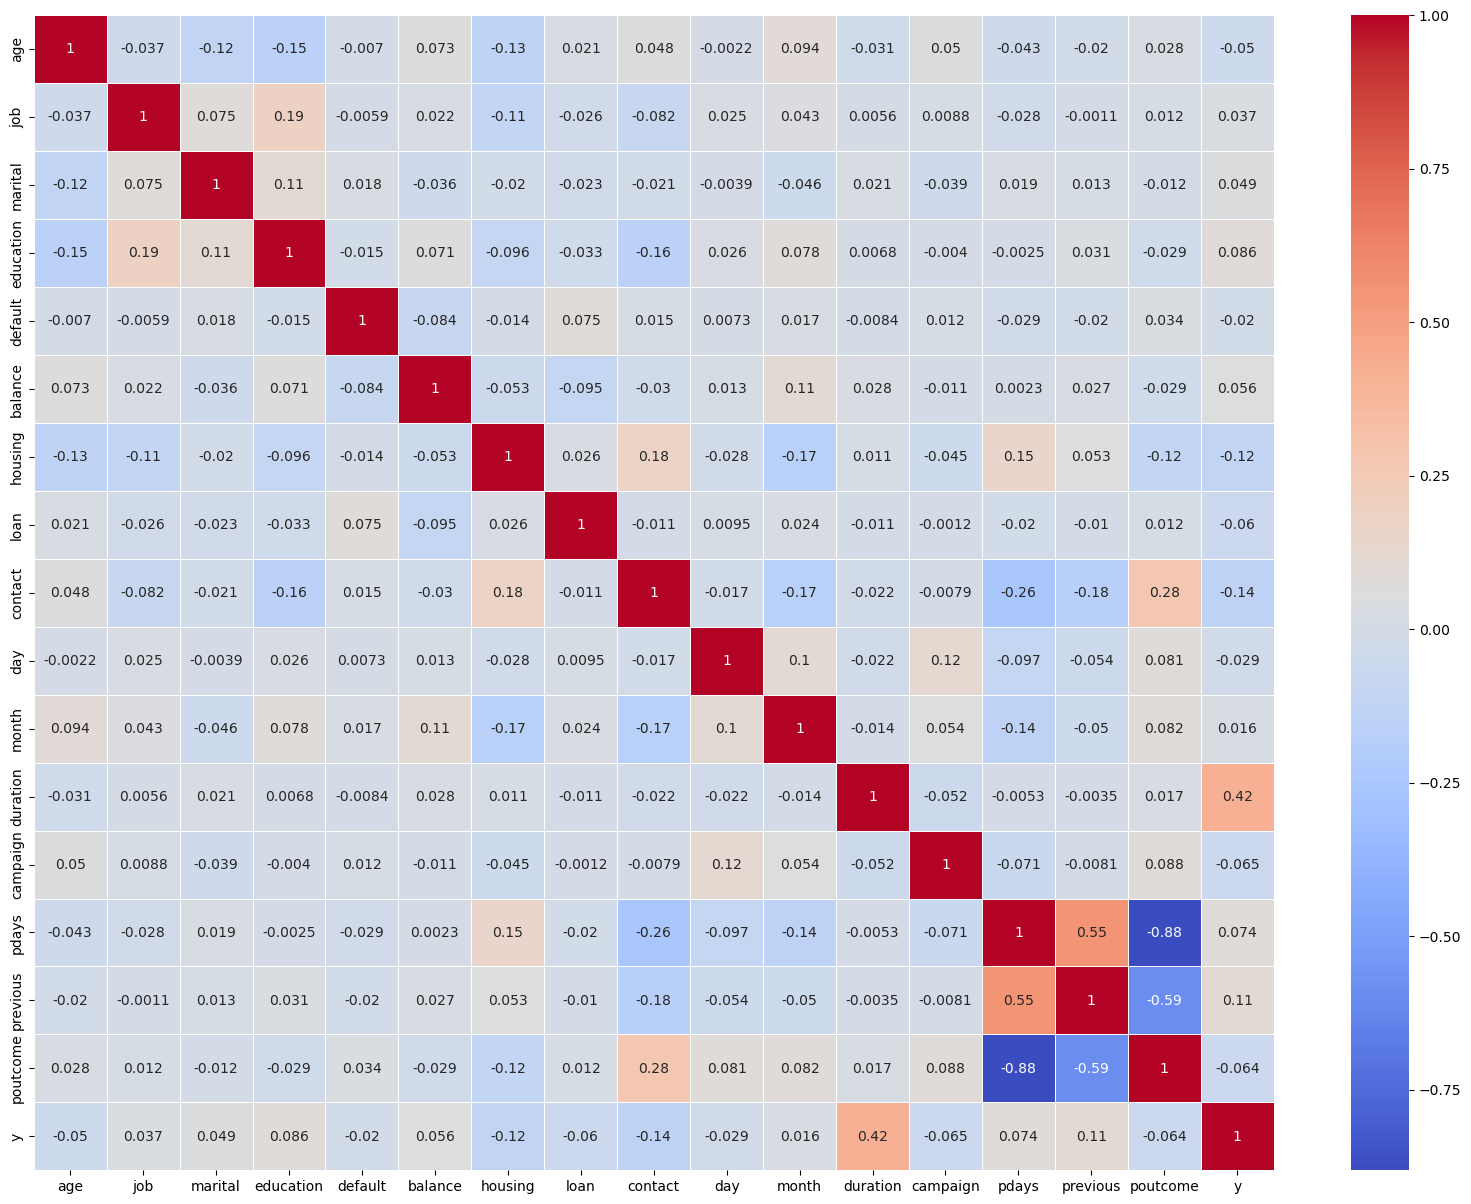

In [100]:
# Ma trận tương quan
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# 5. Modeling

## Sử dụng thuật toán Logistic Regression

In [104]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model= LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

E:\py\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [108]:
# Đánh giá mô hình Logistic Regression mặc định
print("\n# Đánh giá mô hình Logistic regresion (mặc định)")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Đánh giá mô hình Logistic regresion (mặc định)
Accuracy: 0.8990011098779135

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7225
           1       0.59      0.24      0.34       884

    accuracy                           0.90      8109
   macro avg       0.75      0.61      0.64      8109
weighted avg       0.88      0.90      0.88      8109



**Nhận xét**

**Support** :
- Lớp 0: 7225 mẫu.
- Lớp 1: 884 mẫu.
- Nhận xét: Dữ liệu có sự **mất cân bằng**.

**Accuracy** (Độ chính xác tổng thể): 0.90
- Mô hình dự đoán đúng 90% các trường hợp, cả cho lớp 0 (không đăng ký) và lớp 1 (đăng ký).
- Nhận xét: Đây là một kết quả khá tốt. Tuy nhiên, khi xét thấy dữ liệu có hiện tượng mất cân bằng, thì giá trị **Accuracy chưa đủ tin cậy**.

**Precision** :
- Lớp 0 (Không đăng ký): 0.91 (~91%)
  - Trong số các trường hợp mô hình dự đoán là Không đăng ký, 91% thực sự là đúng.
- Lớp 1 (Đăng ký): 0.59 (~59%)
  - Trong số các trường hợp mô hình dự đoán là Đăng ký, 59% thực sự là đúng.
- Nhận xét:  Mô hình hơi **ưu tiên dự đoán chính xác lớp "Không đăng ký"** hơn.

**Recall** :
- Lớp 0 (Không đăng ký): 0.98 (~98%)
  - Trong tất cả các trường hợp thực sự "Không đăng ký", mô hình dự đoán đúng 98%.
- Lớp 1 (Đăng ký): 0.23 (~23%)
  - Trong tất cả các trường hợp thực sự "Đăng ký", mô hình chỉ phát hiện được 23%, bỏ lỡ 77% số trường hợp Đăng ký.
- Nhận xét: Mô hình **có xu hướng bỏ sót nhiều khách hàng thực sự Đăng ký**.

**F1-score** (Trung bình hài hòa của Precision và Recall):
- Lớp 0: 0.94 (~94%)
  - Lớp này có hiệu suất tốt hơn, do Recall và Precision đều cao.
- Lớp 1: 0.33 (~33%)
  - Hiệu suất lớp này kém hơn do Recall và Precision đều thấp.

- Nhận xét:
  - F1-score (lớp 0) > F1-score (lớp 1): **Mô hình (tổng quát) dự đoán cho Lớp 0 (Không đăng ký) có kết quả tốt hơn lớp 1 (Đăng ký).**
  - Weighted avg (0.88) thấp hơn accuracy (0.90) nhưng cao hơn macro avg (0.75). Điều này cho thấy mô hình hoạt động tốt hơn trên lớp đa số (lớp 0).
  - Dữ liệu bị mất cân bằng, tiến hành Sử dụng thuật toán SMOTE để cân bằng dữ liệu huấn luyện



In [111]:
# Kiểm tra số lượng mẫu trong tập huấn luyện trước cân bằng
print("\nSố lượng mẫu mỗi lớp, trong tập huấn luyện (trước cân bằng):")
print(y_train.value_counts())


Số lượng mẫu mỗi lớp, trong tập huấn luyện (trước cân bằng):
y
0    28964
1     3470
Name: count, dtype: int64


In [113]:
from imblearn.over_sampling import SMOTE
# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra số lượng mẫu sau SMOTE
print("\nSố lượng mẫu sau SMOTE:")
print(y_train_resampled.value_counts())


Số lượng mẫu sau SMOTE:
y
0    28964
1    28964
Name: count, dtype: int64


In [115]:
# Huấn luyện Logistic Regression với dữ liệu đã cân bằng
print("\n# Huấn luyện Logistic Regression với dữ liệu đã cân bằng")

# Huấn luyện Logistic Regression
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)


# Huấn luyện Logistic Regression với dữ liệu đã cân bằng


E:\py\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [117]:
# Đánh giá mô hình với dữ liệu đã cân bằng
print("\n# Đánh giá mô hình với dữ liệu đã cân bằng với SMOTE")
y_pred_smote = model_smote.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))


# Đánh giá mô hình với dữ liệu đã cân bằng với SMOTE
Accuracy: 0.8240226908373413

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7225
           1       0.35      0.71      0.47       884

    accuracy                           0.82      8109
   macro avg       0.65      0.78      0.68      8109
weighted avg       0.89      0.82      0.85      8109



### **(1) Cân bằng dữ liệu bằng SMOTE**
- **Mô tả:** Sử dụng SMOTE để tạo thêm dữ liệu nhân tạo cho lớp thiểu số, giúp cân bằng giữa các lớp.
- **Hiệu suất:**
  - Accuracy: **0.82**
  - Precision (lớp 1): **0.34**
  - Recall (lớp 1): **0.71**
  - F1-score (lớp 1): **0.46**
- **Đánh giá:**
  - Cải thiện đồng thời Recall và F1-score của lớp 1, tuy nhiên Precision bị giảm đi.
  - Độ chính xác kém đi khiến cho mô hình không đạt hiệu suất tốt.
  - Mô hình không còn bỏ sót các khách hàng đăng ký nhiều như trước.
  - Thử nghiệm với thuật toán Random Forest

## Sử dụng thuật toán Random Forest Classifier

In [121]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
# Đánh giá mô hình Random Forest Classifier
print("\n# Đánh giá mô hình Random Forest Classifier (mặc định)")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Đánh giá mô hình Random Forest Classifier (mặc định)
Accuracy: 0.9081267727216673

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7225
           1       0.63      0.38      0.47       884

    accuracy                           0.91      8109
   macro avg       0.78      0.68      0.71      8109
weighted avg       0.90      0.91      0.90      8109



**Nhận xét**

**Support** :
- Lớp 0: 7225 mẫu.
- Lớp 1: 884 mẫu.
- Nhận xét: Dữ liệu có sự **mất cân bằng**.

**Accuracy** (Độ chính xác tổng thể): 0.91
- Mô hình dự đoán đúng 91% các trường hợp, cả cho lớp 0 (không đăng ký) và lớp 1 (đăng ký).
- Nhận xét: Đây là một kết quả khá tốt. Tuy nhiên, khi xét thấy dữ liệu có hiện tượng mất cân bằng, thì giá trị **Accuracy chưa đủ tin cậy**.

**Precision** :
- Lớp 0 (Không đăng ký): 0.93 (~93%)
  - Trong số các trường hợp mô hình dự đoán là Không đăng ký, 93% thực sự là đúng.
- Lớp 1 (Đăng ký): 0.64 (~64%)
  - Trong số các trường hợp mô hình dự đoán là Đăng ký, 64% thực sự là đúng.
- Nhận xét:  Mô hình hơi **ưu tiên dự đoán chính xác lớp "Không đăng ký"** hơn.

**Recall** :
- Lớp 0 (Không đăng ký): 0.97 (~97%)
  - Trong tất cả các trường hợp thực sự "Không đăng ký", mô hình dự đoán đúng 97%.
- Lớp 1 (Đăng ký): 0.38 (~38%)
  - Trong tất cả các trường hợp thực sự "Đăng ký", mô hình chỉ phát hiện được 38%, bỏ lỡ 62% số trường hợp Đăng ký.
- Nhận xét: Mô hình **có xu hướng bỏ sót nhiều khách hàng thực sự Đăng ký**.

**F1-score** (Trung bình hài hòa của Precision và Recall):
- Lớp 0: 0.95 (~95%)
  - Lớp này có hiệu suất tốt hơn, do Recall và Precision đều cao.
- Lớp 1: 0.48 (~48%)
  - Hiệu suất lớp này kém hơn do Recall và Precision đều thấp.

- Nhận xét:
  - F1-score (lớp 0) > F1-score (lớp 1): **Mô hình (tổng quát) dự đoán cho Lớp 0 (Không đăng ký) có kết quả tốt hơn lớp 1 (Đăng ký).**
  - Weighted avg (0.90) thấp hơn accuracy (0.91) nhưng cao hơn macro avg (0.79). Điều này cho thấy mô hình hoạt động tốt hơn trên lớp đa số (lớp 0).
  - Dữ liệu bị mất cân bằng, tiến hành Sử dụng thuật toán SMOTE để cân bằng dữ liệu huấn luyện



In [128]:
# Sử dụng smote để dữ liệu giảm mất cân bằng

from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra số lượng mẫu sau SMOTE
print("\nSố lượng mẫu sau SMOTE:")
print(y_train_resampled.value_counts())


Số lượng mẫu sau SMOTE:
y
0    28964
1    28964
Name: count, dtype: int64


In [130]:
# Huấn luyện RandomForestClassifier với dữ liệu đã cân bằng
print("\n# Huấn luyện RandomForestClassifier với dữ liệu đã cân bằng")

# Huấn luyện RandomForestClassifier
model_smote_rf = RandomForestClassifier(random_state=42)
model_smote_rf.fit(X_train_resampled, y_train_resampled)


# Huấn luyện RandomForestClassifier với dữ liệu đã cân bằng


RandomForestClassifier(random_state=42)

In [132]:

# Đánh giá mô hình với dữ liệu đã cân bằng
print("\n# Đánh giá mô hình RandomForestClassifier với dữ liệu đã cân bằng với SMOTE")
y_pred_smote_rf = model_smote_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_smote_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote_rf))


# Đánh giá mô hình RandomForestClassifier với dữ liệu đã cân bằng với SMOTE
Accuracy: 0.8928351214699717

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7225
           1       0.51      0.66      0.57       884

    accuracy                           0.89      8109
   macro avg       0.73      0.79      0.76      8109
weighted avg       0.91      0.89      0.90      8109



- **Mô tả:** Sử dụng SMOTE để tạo thêm dữ liệu nhân tạo cho lớp thiểu số, giúp cân bằng giữa các lớp.
- **Hiệu suất:**
  - Accuracy: **0.89**
  - Precision (lớp 1): **0.51**
  - Recall (lớp 1): **0.66**
  - F1-score (lớp 1): **0.57**
- **Đánh giá:**
  - Cải thiện đồng thời Recall và F1-score của lớp 1, tuy nhiên Precision bị giảm đi.
  - Độ chính xác kém đi nhưng không đáng kể, mô hình hoạt động tốt.
  - Mô hình không còn bỏ sót các khách hàng đăng ký nhiều như trước.
  - Tiếp tục thử nghiệm với thuật toán XGBoost.

## Sử dụng thuật toán XGBoost

In [137]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# sử dụng thuật toán XGBoost

!pip install xgboost
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(random_state=42)

# Huấn luyện mô hình với dữ liệu huấn luyện
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb_model.predict(X_test)

# Đánh giá mô hình
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print('XGBoost Accuracy:', accuracy_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)

XGBoost Accuracy: 0.9125662843753853
Confusion Matrix:
 [[6941  284]
 [ 425  459]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7225
           1       0.62      0.52      0.56       884

    accuracy                           0.91      8109
   macro avg       0.78      0.74      0.76      8109
weighted avg       0.91      0.91      0.91      8109



**Nhận xét**

**Support** :
- Lớp 0: 7225 mẫu.
- Lớp 1: 884 mẫu.
- Nhận xét: Dữ liệu có sự **mất cân bằng**.

**Accuracy** (Độ chính xác tổng thể): 0.91
- Mô hình dự đoán đúng 91% các trường hợp, cả cho lớp 0 (không đăng ký) và lớp 1 (đăng ký).
- Nhận xét: Đây là một kết quả khá tốt. Tuy nhiên, khi xét thấy dữ liệu có hiện tượng mất cân bằng, thì giá trị **Accuracy chưa đủ tin cậy**.

**Precision** :
- Lớp 0 (Không đăng ký): 0.94 (~94%)
  - Trong số các trường hợp mô hình dự đoán là Không đăng ký, 94% thực sự là đúng.
- Lớp 1 (Đăng ký): 0.61 (~61%)
  - Trong số các trường hợp mô hình dự đoán là Đăng ký, 61% thực sự là đúng.
- Nhận xét:  Mô hình hơi **ưu tiên dự đoán chính xác lớp "Không đăng ký"** hơn.

**Recall** :
- Lớp 0 (Không đăng ký): 0.96 (~96%)
  - Trong tất cả các trường hợp thực sự "Không đăng ký", mô hình dự đoán đúng 96%.
- Lớp 1 (Đăng ký): 0.50 (~50%)
  - Trong tất cả các trường hợp thực sự "Đăng ký", mô hình chỉ phát hiện được 50%, bỏ lỡ 50% số trường hợp Đăng ký.
- Nhận xét: Mô hình **có xu hướng bỏ sót nhiều khách hàng thực sự Đăng ký**.

**F1-score** (Trung bình hài hòa của Precision và Recall):
- Lớp 0: 0.95 (~95%)
  - Lớp này có hiệu suất tốt hơn, do Recall và Precision đều cao.
- Lớp 1: 0.55 (~55%)
  - Hiệu suất lớp này kém hơn do Recall và Precision đều thấp.

- Nhận xét:
  - F1-score (lớp 0) > F1-score (lớp 1): **Mô hình (tổng quát) dự đoán cho Lớp 0 (Không đăng ký) có kết quả tốt hơn lớp 1 (Đăng ký).**
  - Weighted avg (0.90) thấp hơn accuracy (0.91) nhưng cao hơn macro avg (0.77). Điều này cho thấy mô hình hoạt động tốt hơn trên lớp đa số (lớp 0).
  - Dữ liệu bị mất cân bằng, tiến hành Sử dụng thuật toán SMOTE để cân bằng dữ liệu huấn luyện



In [160]:
# Sử dụng smote để dữ liệu bớt mất cân bằng

from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra số lượng mẫu sau SMOTE
print("\nSố lượng mẫu sau SMOTE:")
print(y_train_resampled.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Số lượng mẫu sau SMOTE:
y
0    28964
1    28964
Name: count, dtype: int64


In [161]:
from sklearn.metrics import confusion_matrix

# Huấn luyện XGBoost với dữ liệu đã được cân bằng bằng SMOTE
xgb_model_smote = XGBClassifier(random_state=42)
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

# Đánh giá mô hình
accuracy_xgb_smote = accuracy_score(y_test, y_pred_xgb_smote)
conf_matrix_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)
class_report_xgb_smote = classification_report(y_test, y_pred_xgb_smote)

print('XGBoost with SMOTE Accuracy:', accuracy_xgb_smote)
print('Confusion Matrix:\n', conf_matrix_xgb_smote)
print('Classification Report:\n', class_report_xgb_smote)

XGBoost with SMOTE Accuracy: 0.8938216796152423
Confusion Matrix:
 [[6640  585]
 [ 276  608]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7225
           1       0.51      0.69      0.59       884

    accuracy                           0.89      8109
   macro avg       0.73      0.80      0.76      8109
weighted avg       0.91      0.89      0.90      8109



### **(3) Cân bằng dữ liệu bằng SMOTE**
- **Mô tả:** Sử dụng SMOTE để tạo thêm dữ liệu nhân tạo cho lớp thiểu số, giúp cân bằng giữa các lớp.
- **Hiệu suất:**
  - Accuracy: **0.89**
  - Precision (lớp 1): **0.51**
  - Recall (lớp 1): **0.69**
  - F1-score (lớp 1): **0.59**
- **Đánh giá:**
  - Cải thiện đồng thời Recall và F1-score của lớp 1, tuy nhiên Precision giảm đi.
  - Độ chính xác kém đi nhưng không đáng kể, mô hình vẫn hoạt động tốt.
  - Mô hình không còn bỏ sót các khách hàng đăng ký nhiều như trước.

# Đánh giá mô hình
1. <b>Ưu điểm</b>:
  - Mô hình hoạt động khá tốt, với độ chính xác tổng thể đạt 89%.
  - Độ nhạy của lớp 0 cũng rất tốt, cho thấy mô hình ít bỏ sót các mẫu thực sự thuộc lớp 0.
  - Kỹ thuật SMOTE đã giúp cải thiện việc cân bằng dữ liệu, đặc biệt là đối với lớp thiểu số.
2. <b>Hạn chế</b>:
  - Precision của cả hai lớp chênh lệch khá lớn (96% so với 51%), cho thấy mô hình đang lệch hẳn về lớp 0 (Không đăng ký).
  - Recall của lớp 1 (Đăng ký) chỉ đạt 68%, nghĩa là mô hình bỏ sót 32% số hành khách đăng ký.
  - Với bài toán Phân loại khách hàng tiềm năng, lớp "Đăng ký" (lớp 1) mang ý nghĩa quan trọng hơn đối với ngân hàng, vì họ cần biết được có bao nhiêu người sẽ đăng ký sử dụng dịch vụ Tiền gửi có kỳ hạn của họ.